#   CSC 369 2.0 - Machine Learning I - Assignment
###"Mobile Phone Price Estimation using ML"

---




Bob has started his own mobile company. He wants to give tough fight to big companies like Apple, Samsung, etc. He does not know how to estimate price of mobile phones his company manufactured. In this competitive market you cannot simply assume things. To solve this problem he collected sales data of mobile phones of various companies. Bob wants to find out some relation between features of mobile phones (e.g., RAM, Internal Memory, etc.) and their selling prices. But he is not so good at Machine Learning. So, he needs your help to solve this problem. In this problem, you do not have to predict the actual price but a price range indicating how high the price is. The following are the attribute of the dataset:
1. battery_power: Total energy a battery can store in one time measured in mAh
2. blue: Has Bluetooth or not
3. clock_speed: speed at which microprocessor executes instructions
4. dual_sim: Has dual sim support or not
5. fc: Front Camera mega pixels
6. four_g: Has 4G or not
7. int_memory: Internal Memory in Gigabytes
8. m_dep: Depth in cm
9. mobile_wt: Weight of mobile phone
10. n_cores: Number of cores of processor
11. pc: Primary Camera mega pixels
12. px_height: Pixel Resolution Height
13. px_width: Pixel Resolution Width
14. ram: Random Access Memory in Megabytes
15. sc_h: Screen Height of mobile in cm
16. sc_w: Screen Width of mobile in cm
17. talk_time: Longest time that a single battery charge will last
18. three_g: Has 3G or not
19. touch_screen: Has touch screen or not
20. wifi – Has wifi or not
21. price_range: four price ranges (0, 1, 2, 3)

There are 2,000 records in the dataset. Use 80% and 20% of this data for training and testing respectively

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

### Importing "Mobile_Dataset" dataset from Google Drive

In [ ]:
# Importing PyDrive and associated libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticating and creating the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Downloading the file based on its file ID
file_id = '1H5sboOFqacfqgTj-azQzz1Svhc7SD5MF' # Obtained from the shareable link of the file
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Mobile_Dataset.csv')

# Initializing df, the DataFrame variable to store the dataset 
import pandas as pd
df = pd.read_csv("Mobile_Dataset.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


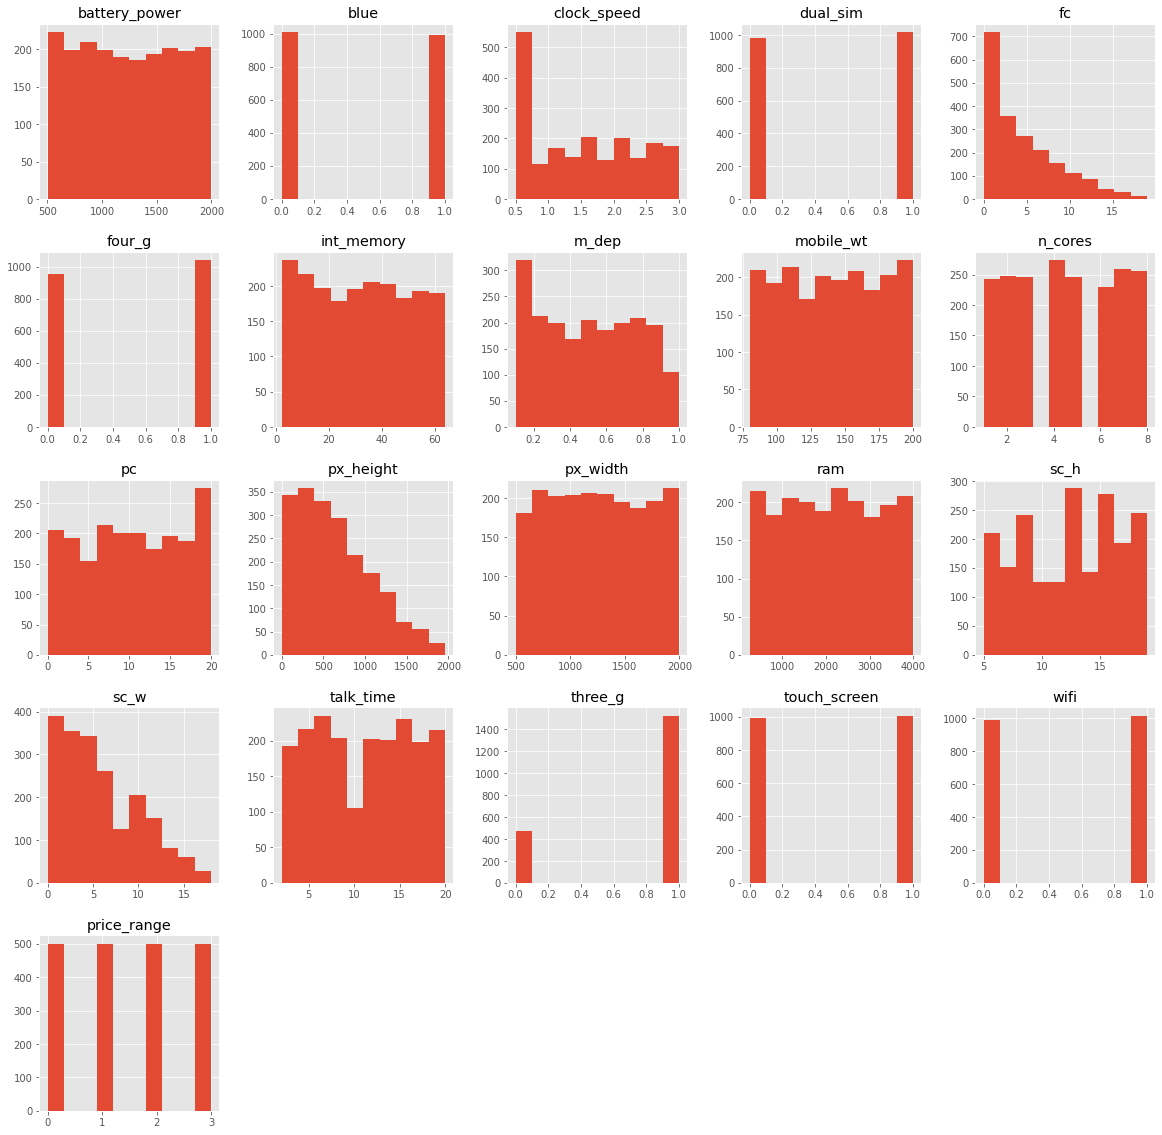

In [ ]:
# Plotting histrograms of the input features against the size of the data set ( to obtain a surface level understanding on the data )

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.DataFrame.hist(df, figsize = [20,20]);

### Preprocessing of the data

In [ ]:
# Handling of missing data
# This function returns the number of null values in each column of the dataset
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# This function prints information about the dataset including the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# As priorly checked using the histograms, negative values are not included in the dataset 
# This function returns the number of zero values of the input feature values that must not be included with zero values 
(df[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]==0).sum()

battery_power      0
clock_speed        0
fc               474
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
dtype: int64

In [ ]:
# Replacing the zero values of the input feature values which should not contained non zero positive values with NumPy NaN
# NaN is defined as a substitute for declaring values which deviates from the rest of the data
import numpy as np
df[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]=df[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']].replace(0,np.NAN)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,NaN,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,NaN,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,NaN,1,2,0.8,106,6,...,1222.0,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,NaN,0,39,0.2,187,4,...,915.0,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1,36,0.7,108,8,...,868.0,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1,46,0.1,145,5,...,336.0,670,869,18,10.0,19,1,1,1,0


In [ ]:
# This function calculates some statistical data such as percentile, mean and std of the numerical values of the dataset
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1526.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,1998.000000,2000.000000,2000.000000,2000.000000,1820.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,5.648100,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.753754,1251.515500,2124.213000,12.306500,6.337363,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.140169,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.532906,432.199447,1084.732044,4.213245,4.152062,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,1.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,2.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,874.750000,1207.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,5.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,565.500000,1247.000000,2146.500000,12.000000,6.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,8.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.750000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Replacing NaN with the mean value of the respective input features 
df = df.fillna(df.mean())
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0000,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,5.6481,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0000,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,5.6481,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0000,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,5.6481,1,2,0.8,106,6,...,1222.0,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,5.6481,0,39,0.2,187,4,...,915.0,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0000,1,36,0.7,108,8,...,868.0,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0000,1,46,0.1,145,5,...,336.0,670,869,18,10.0,19,1,1,1,0


In [ ]:
# Label encoding to preprocess the data
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['price_range']= label_encoder.fit_transform(df['price_range'])
df['price_range'].unique()

array([1, 2, 3, 0])

### Splitting the dataset into Training and Testing Sets

In [ ]:
# Printing the array storing the variables in the order accordingly
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Assigning input feature values and target values respectively to X and y variables
X = df[df.columns[:-1]].values                                                                   # X = df.drop('price_range' , 1).values #Dropping the target variable
y = df[df.columns[-1]].values  # since 'price_range' target values include in the last column    # y = df['price_range'].values


In [ ]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape = ", X_train.shape) 
print("y_train shape = ", y_train.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (1600, 20)
y_train shape =  (1600,)
X_test shape =  (400, 20)
y_test shape =  (400,)


## kNN Model Implementation using Sci-kit Learn

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kNN_model = KNeighborsClassifier(n_neighbors=5)
kNN_model.fit(X_train, y_train)   # Training the dataset


KNeighborsClassifier()

In [ ]:
# Assigning the predicted output values of the training dataset
y_pred_kNN = kNN_model.predict(X_test)
print(y_pred_kNN)


[0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 2 2 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 2 3 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 2 3 1 0 1 0 1 3 3 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 0 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 1 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 2 1 1 2]


#### Post training analysis of kNN model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print('Classification report for kNN model :')
print(classification_report(y_test, y_pred_kNN))

Classification report for kNN model :
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.93      0.93        91
           2       0.89      0.91      0.90        92
           3       0.97      0.94      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [ ]:
print('Accuracy score for kNN model =',accuracy_score(y_test, y_pred_kNN))

Accuracy score for kNN model = 0.9425


In [ ]:
print('Confusion matrix for kNN model :')
print(confusion_matrix(y_test, y_pred_kNN))

Confusion matrix for kNN model :
[[103   2   0   0]
 [  3  85   3   0]
 [  0   5  84   3]
 [  0   0   7 105]]


### Determining the optimal value for K for the given range

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 11}

In [ ]:
# kNN model with k=11
kNN_model = KNeighborsClassifier(n_neighbors=11)
kNN_model.fit(X_train, y_train)   # Training the dataset


KNeighborsClassifier(n_neighbors=11)

In [ ]:
# Assigning the predicted output values of the training dataset
y_pred_kNN = kNN_model.predict(X_test)

print('Classification report for kNN model :')
print(classification_report(y_test, y_pred_kNN))

Classification report for kNN model :
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.96      0.94        91
           2       0.91      0.93      0.92        92
           3       1.00      0.93      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [ ]:
print('Accuracy score for kNN model =',accuracy_score(y_test, y_pred_kNN))

Accuracy score for kNN model = 0.95


In [ ]:
print('Confusion matrix for kNN model :')
print(confusion_matrix(y_test, y_pred_kNN))

Confusion matrix for kNN model :
[[103   2   0   0]
 [  3  87   1   0]
 [  0   6  86   0]
 [  0   0   8 104]]


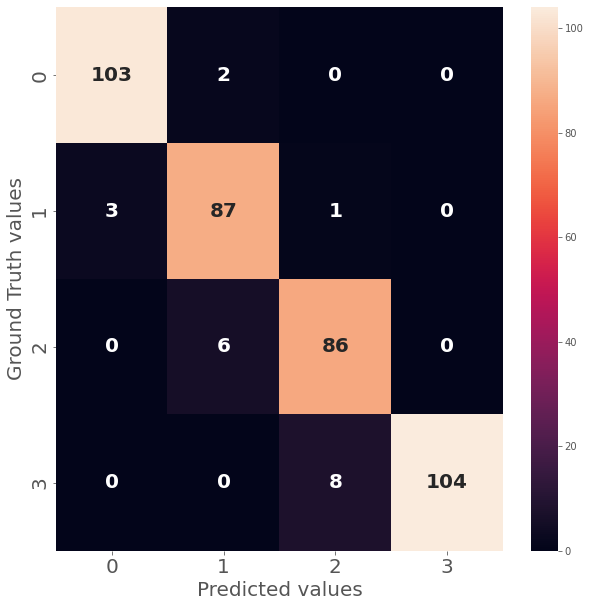

In [ ]:
import seaborn as sb
# Plotting confusion matrix
ax_kNN = plt.subplots(figsize=(10,10))

ax_kNN = sb.heatmap(confusion_matrix(y_test, y_pred_kNN),annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  

labels = ['0','1','2','3']

ax_kNN.set_xticklabels(labels, fontsize=20);
ax_kNN.set_yticklabels(labels, fontsize=20);

ax_kNN.set_xlabel('Predicted values', fontsize=20);
ax_kNN.set_ylabel('Ground Truth values', fontsize=20)
plt.show()

## Multi-layer Neural Network Model Implementation using Keras

---



#### Prepocessing of the data contd.

In [ ]:
# Scaling the training dataset with MinMax scaler
from sklearn.preprocessing import MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_train)
X_train

array([[0.9498998 , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.08817635, 1.        , 0.68      , ..., 1.        , 1.        ,
        1.        ],
       [0.49098196, 0.        , 0.16      , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.88710755, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.95257181, 0.        , 0.16      , ..., 0.        , 1.        ,
        1.        ],
       [0.08951236, 1.        , 0.04      , ..., 1.        , 0.        ,
        0.        ]])

#### Building the MLNN Model

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

MLNN_model = Sequential([
 Dense(64, activation ='relu', input_shape = (20,)),
 Dense(32, activation ='relu'),
 Dense(32, activation ='relu'),
 Dense(4, activation ='softmax')
])
MLNN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,612
Trainable params: 4,612
Non-trainable params: 0
_________________________________________________________________


#### Compiling the model

In [ ]:
from keras.losses import SparseCategoricalCrossentropy # Since a multi-class classification should be done
from keras.optimizers import Adam

MLNN_model.compile( optimizer = 'adam',
                   loss = SparseCategoricalCrossentropy(),
                   metrics = 'accuracy')

In [ ]:
# spilitting the test dataset to create a validation set  
X_train, X_valAndtest, y_train, y_valAndtest = train_test_split(X, y, test_size=0.2 , random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valAndtest, y_valAndtest, test_size=0.5)


In [ ]:
print("X_val shape = ", X_val.shape) 
print("y_val shape = ", y_val.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_val shape =  (200, 20)
y_val shape =  (200,)
X_test shape =  (200, 20)
y_test shape =  (200,)


#### Fitting the model

In [ ]:
MLNN_model_history = MLNN_model.fit(X_train, y_train, epochs = 300,validation_data=(X_val, y_val))

#MLNN_model.fit(X_train, y_train, epochs = 100,validation_split = 0.1)

Epoch 1/300
50/50 [==============================] - 1s 7ms/step - loss: 110.5776 - accuracy: 0.3713 - val_loss: 12.1489 - val_accuracy: 0.5150
Epoch 2/300
50/50 [==============================] - 0s 3ms/step - loss: 10.2254 - accuracy: 0.4762 - val_loss: 8.1959 - val_accuracy: 0.5400
Epoch 3/300
50/50 [==============================] - 0s 3ms/step - loss: 7.4502 - accuracy: 0.4831 - val_loss: 7.5057 - val_accuracy: 0.5300
Epoch 4/300
50/50 [==============================] - 0s 4ms/step - loss: 5.6079 - accuracy: 0.5056 - val_loss: 5.4023 - val_accuracy: 0.5600
Epoch 5/300
50/50 [==============================] - 0s 3ms/step - loss: 4.3141 - accuracy: 0.5369 - val_loss: 3.6356 - val_accuracy: 0.5200
Epoch 6/300
50/50 [==============================] - 0s 3ms/step - loss: 3.7150 - accuracy: 0.5306 - val_loss: 2.3013 - val_accuracy: 0.5900
Epoch 7/300
50/50 [==============================] - 0s 3ms/step - loss: 2.9798 - accuracy: 0.5625 - val_loss: 2.2104 - val_accuracy: 0.6000
Epoch 8/3

#### Evaluating the model and Predicting

In [44]:
MLNN_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8350


[0.3903447985649109, 0.8349999785423279]

In [45]:
y_pred = MLNN_model.predict(X_test)
y_pred_MLNN = y_pred.argmax(axis=-1)
print ("True class = ", y_test[0], "Predicted class = ", y_pred_MLNN[0])


7/7 [==============================] - 0s 4ms/step
True class =  0 Predicted class =  0


#### Post training analysis of MLNN model

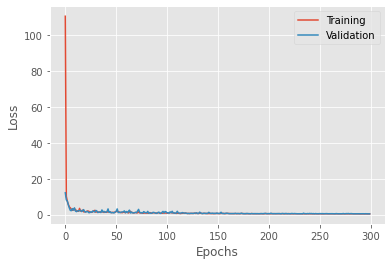

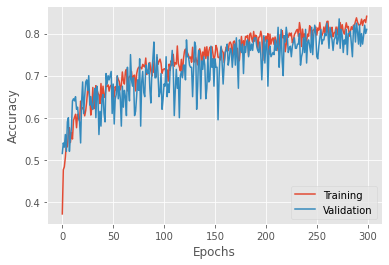

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(MLNN_model_history)

The learning curve (Epochs vs Loss) indicates the model is overfitting:

-If there is a clear gap between the training and validation scores.
-When the validation error (loss) begins increasing at some point while the training error (loss) still decreases. In the case of accuracy, the validation accuracy begins decreasing at some point while the training accuracy still increases.

According to above graphs,seemingly there may not be a severe overfitting.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print('Classification report for MLNN model :')
print(classification_report(y_test,y_pred_MLNN))

Classification report for MLNN model :
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.74      0.83      0.78        41
           2       0.72      0.70      0.71        47
           3       0.89      0.89      0.89        61

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200



In [ ]:
print('Accuracy score for MLNN model =',accuracy_score(y_test, y_pred_MLNN))

Accuracy score for MLNN model = 0.835


In [ ]:
print('Confusion matrix for MLNN model :')
print(confusion_matrix(y_test, y_pred_MLNN))

Confusion matrix for MLNN model :
[[46  5  0  0]
 [ 1 34  6  0]
 [ 0  7 33  7]
 [ 0  0  7 54]]


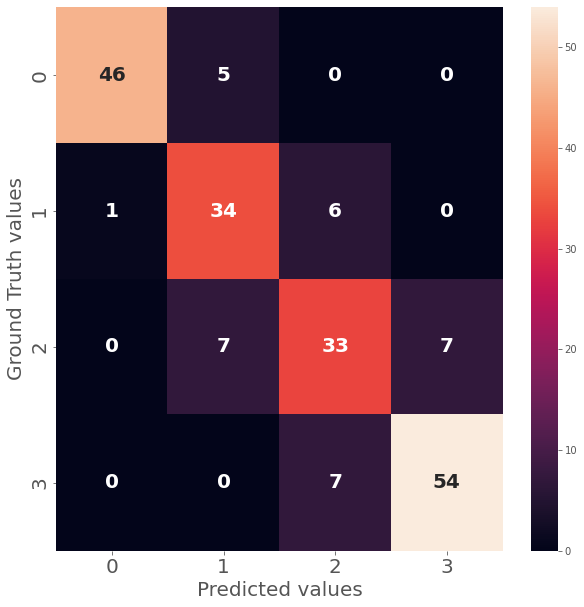

In [ ]:
import seaborn as sb
# Plotting confusion matrix
ax_kNN = plt.subplots(figsize=(10,10))

ax_kNN = sb.heatmap(confusion_matrix(y_test, y_pred_MLNN),annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  

labels = ['0','1','2','3']

ax_kNN.set_xticklabels(labels, fontsize=20);
ax_kNN.set_yticklabels(labels, fontsize=20);

ax_kNN.set_xlabel('Predicted values', fontsize=20);
ax_kNN.set_ylabel('Ground Truth values', fontsize=20)
plt.show()

## Comparing the designed ML models

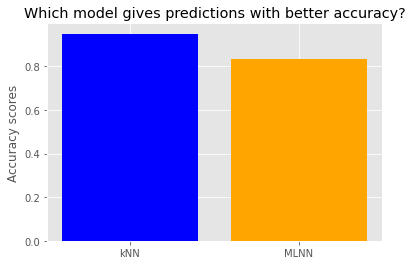

In [ ]:
# Comparing the two models with respective accuracy scores obtained

import matplotlib.pyplot as plt

models = ['kNN','MLNN']
accuracy_scores = [0.95,0.8350]

plt.bar(models, accuracy_scores, color=['blue', 'orange'])
plt.ylabel("Accuracy scores")
plt.title("Which model gives predictions with better accuracy?")
plt.show()